# Machine Learning to Predict Earnings for Stocks: Neural Networks

**Hugh Donnelly, CFA**<br> 
*AlphaWave Data*

**September 2021**

### Introduction
In this article, we are going to cover Neural Networks (NN). Let's begin by laying down the theoretical foundation of the algorithm.

Jupyter Notebooks are available on [Google Colab]() and [Github]().

For this project, we use several Python-based scientific computing technologies listed below.

In [1]:
import re
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

You may have heard various buzz words associated with Neural Networks (NN) like Artificial Intelligence, [Machine Learning](https://hdonnelly6.medium.com/list/machine-learning-for-investing-7f2690bb1826), and Deep Learning.  For clarification, Deep Learning is a sub-field of Neural Networks which is a sub-field of Machine Learning and they all fall under the umbrella of Artificial Intelligence.

<h4>AI versus Machine Learning versus Neural Networks versus Deep Learning</h4>  
<img src='ML Photos/1_NN_ML_Graph.PNG'>

Neural Networks (NN) is a prediction algorithm where you define a set of features to make predictions on a label.  These labels can be binary (e.g. Is this email spam?), multi-label classification (e.g. handwritten text), or [regression](https://hdonnelly6.medium.com/introduction-to-machine-learning-regression-fee4200132f0) (e.g. What is the price of an equity option?).  NN can also be used in adaptive control problems (e.g. autonomous driving).

NN are ubiquitous.  Sophisticated market participants are using NN for alpha generation, hedging, and scenario analysis.  Technology companies are using NN to suggest which video you should watch next and what type of news you should be consuming.  So how can the NN algorithm be so flexible that it can be used to predict such a wide variety of labels?

NN are loosely based on how the brain learns.  First, you set up a NN architecture that you believe is commiserate with the complexity of your problem.  The simplest NN architecture will include an input neuron layer, an output layer, and an activation function.  Next, you give the NN a set of features you believe are important when predicting an outcome.  The NN will then determine the relationship and patterns between each neuron to generate the most plausible outcome.  Before we use the NN to make predictions, we need to train the NN.

<h4>Neural Network Equation</h4>  
<img src='ML Photos/2_NN_Equation.PNG'>

<h4>Neural Network Layer Graph</h4>  
<img src='ML Photos/2a_NN_Layers_Graph.PNG'>

Some of the biggest misconceptions and misuses of NN is that people will feed more features or increase the complexity of the NN thinking this will allow the algorithm to detect more patterns and make better predictions.  This is not necessarily true as your NN is more likely to be overfit and therefore the predictions cannot be trusted.

For NN to perform well, one must pre-process and normalize quality features, choose an appropriate architecture, and properly tune parameters.  Above all, domain knowledge is paramount.  There is no substitution for experience and intuition when working with data and making predictions.  Assuming one has domain experience and solid knowledge of how NN work, there are several advantages of using NN over other machine learning algorithms.

NN can learn and adapt on their own which make them useful for real time applications.  NN also have fault tolerance meaning the algorithm will continue to operate if one or more neurons fail.  It also does a good job at handling nonlinear relationships.  NN can also handle multiple tasks in parallel lending itself to distributed computing.

Let's look at how we can use NN to make binary predictions on earnings.

### Initial Setup
Now let's retrieve simulated quarterly fundamentals data over a ten year period for anonymized members of the S&P 500 from a saved pickle file for this analysis.  This pickle file contains more than 40 features that we will use to predict the direction of the next quarter's earnings based on the current quarter's fundamental data.

If you wish, you can also use real financial data provided by [AlphaWave Data](https://www.alphawavedata.com/) in this analysis.

In [2]:
# Load equity dataframe from the saved pickle file
data = pd.read_pickle("./nn_data.pkl")
data

,EPS,change in EPS,Account Receivable Turnover,Current Ratio,Quick Ratio,Inventory Turnover,Total Debt To Equity,EBITDA Margin,ROA,ROE,...,Change in Equity to Fixed Assets,Change in Sales to Total Assets,Change in EBIT to revenue,Change in Profit margin,Change in Sales to Inventory,Change in Sales to Working capital,Change in R&D to Revenue,Change in working cap to Assets,Change in Operating Income or Losses,Change in EBITDA Margin
ID,,,,,,,,,,,,,,,,,,,,,
0,2.394,NaN,NaN,3.745478,2.619692,NaN,1282.212454,22.787274,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2.644,0.250000,NaN,3.995833,2.788106,NaN,1277.191693,23.868634,NaN,NaN,...,2.757370,6.592717,13.261200,11.661122,11.504201,-0.892583,56.254868,1.507437,20.728190,10.350641
0,2.794,0.150000,NaN,4.462660,3.048407,NaN,1275.590018,26.162307,NaN,NaN,...,3.673544,-5.245019,21.163128,18.344738,-7.675397,-14.137102,0.616639,-1.588617,14.808099,19.895452
0,0.854,-1.940000,NaN,3.512796,2.160066,NaN,1272.062872,18.660007,NaN,NaN,...,-25.307362,8.587284,-66.485837,-127.380356,-9.344565,57.779330,16.129232,14.802637,-63.607881,-54.276757
0,2.274,1.420000,NaN,3.680017,2.374922,NaN,1269.596817,22.370680,NaN,NaN,...,3.001286,3.372182,100.382200,-361.161166,12.828012,-4.124261,-32.412458,-2.905321,107.139453,58.713109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,1.914,0.306168,14.783556,2.844682,2.526065,NaN,1399.524214,49.605136,4.393086,19.923301,...,-23.268399,4.423973,6.126118,69.289285,NaN,-19.917751,NaN,-8.792037,10.821108,6.053170
504,1.784,-0.130000,14.864186,2.843043,2.631217,NaN,1401.624076,53.525240,4.715484,20.690754,...,NaN,-5.681214,18.362582,-15.160033,NaN,5.456669,NaN,-0.223852,11.638151,10.519497
504,1.634,-0.150000,15.180999,3.065134,2.847354,NaN,1388.890037,53.701669,-0.439290,0.712332,...,NaN,-4.431060,-2.815343,-24.099620,NaN,-22.544284,NaN,-0.832590,-7.121654,0.428377


Before we can put our data into the NN, we need to pre-process our data. Let's begin by outlining the steps we will take to make this prediction.

### Earnings movement prediction

#### Forecast direction of next quarter earnings based on accounting information of the current quarter

#### Steps:
- Enhance data with additional information
- Preprocess the data
- Learn how to apply Neural Network algorithm on our dataset




Let's have a look at the first seven rows of the data.

In [3]:
data.head(7)

,EPS,change in EPS,Account Receivable Turnover,Current Ratio,Quick Ratio,Inventory Turnover,Total Debt To Equity,EBITDA Margin,ROA,ROE,...,Change in Equity to Fixed Assets,Change in Sales to Total Assets,Change in EBIT to revenue,Change in Profit margin,Change in Sales to Inventory,Change in Sales to Working capital,Change in R&D to Revenue,Change in working cap to Assets,Change in Operating Income or Losses,Change in EBITDA Margin
ID,,,,,,,,,,,,,,,,,,,,,
0,2.394,NaN,NaN,3.745478,2.619692,NaN,1282.212454,22.787274,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2.644,0.25,NaN,3.995833,2.788106,NaN,1277.191693,23.868634,NaN,NaN,...,2.757370,6.592717,13.261200,11.661122,11.504201,-0.892583,56.254868,1.507437,20.728190,10.350641
0,2.794,0.15,NaN,4.462660,3.048407,NaN,1275.590018,26.162307,NaN,NaN,...,3.673544,-5.245019,21.163128,18.344738,-7.675397,-14.137102,0.616639,-1.588617,14.808099,19.895452
0,0.854,-1.94,NaN,3.512796,2.160066,NaN,1272.062872,18.660007,NaN,NaN,...,-25.307362,8.587284,-66.485837,-127.380356,-9.344565,57.779330,16.129232,14.802637,-63.607881,-54.276757
0,2.274,1.42,NaN,3.680017,2.374922,NaN,1269.596817,22.370680,NaN,NaN,...,3.001286,3.372182,100.382200,-361.161166,12.828012,-4.124261,-32.412458,-2.905321,107.139453,58.713109
0,2.574,0.30,NaN,4.147761,2.557516,NaN,1271.878524,27.391565,NaN,NaN,...,0.764649,-3.881248,60.809354,33.878319,-13.313170,-15.590030,-1.029015,11.213908,54.567944,50.055277
0,2.704,0.13,NaN,4.010166,2.755451,NaN,1269.347628,26.213858,NaN,NaN,...,4.291332,-6.001707,-8.553836,9.626472,10.275125,-5.016895,5.171649,-15.321621,-14.042167,-7.824481


Let's begin by enriching our data with some additional columns. In a typical machine learning workflow, the majority of the effort is usually dedicated to data cleaning and data preparation. In order for us to run the NN successfully, we need to do a lot of the necessary work before we can actually feed the data into the model. To enhance the data, we follow the below steps.

#### Enhance data:
- Change in Earnings per share : (Current Period EPS - Prior Period EPS)
- Assign 1 to positive change in EPS and 0 to negative change
- Shift data index by -1: we will be using current financial data to predict future change in earnings


In [4]:
# Create binary column of positive and negative earnings changes
data['binary change'] = [1 if row['change in EPS'] > 0 else 0 for _,row in data.iterrows()]

# Shift date index by -1 so we are predicting future changes: 1 or 0
data['Future change'] = data['binary change'].shift(-1)

In [5]:
# Goal is to anticipate the sign of future earnings change from the financial data of the current quarter.
# If the future earnings changes is + , we assign 1, otherwise 0, to Future change value of the current quarter
data[['EPS','change in EPS','Future change']].head(6)

,EPS,change in EPS,Future change
ID,,,
0,2.394,NaN,1.0
0,2.644,0.25,1.0
0,2.794,0.15,0.0
0,0.854,-1.94,1.0
0,2.274,1.42,1.0
0,2.574,0.30,1.0


Using pandas describe function to examine our data, you can see there are a number of columns that have negative and positive infinity.

In [6]:
# Examine data 
data.describe()

,EPS,change in EPS,Account Receivable Turnover,Current Ratio,Quick Ratio,Inventory Turnover,Total Debt To Equity,EBITDA Margin,ROA,ROE,...,Change in EBIT to revenue,Change in Profit margin,Change in Sales to Inventory,Change in Sales to Working capital,Change in R&D to Revenue,Change in working cap to Assets,Change in Operating Income or Losses,Change in EBITDA Margin,binary change,Future change
count,19404.00000,18904.000000,1.100700e+04,16477.000000,16475.000000,8737.000000,18739.000000,18047.000000,13282.000000,12508.000000,...,1.833000e+04,1.910800e+04,12930.000000,1.604000e+04,5954.000000,15930.000000,1.897100e+04,17581.000000,20200.000000,20199.000000
mean,2.21570,0.026427,inf,3.158567,2.510007,20.707292,1433.474738,35.343390,4.086419,23.379214,...,inf,NaN,4.048570,inf,inf,-2.145640,inf,-5.566898,0.499802,0.499827
std,2.52075,1.936901,NaN,1.548858,1.250579,25.147403,3678.680565,77.036993,7.077900,36.740955,...,NaN,NaN,112.057283,NaN,NaN,478.940556,NaN,861.516401,0.500012,0.500012
min,-37.79600,-46.530000,1.234000e+01,1.295010,1.251109,12.340000,1222.263535,-5571.530968,-459.673370,-606.632332,...,-2.222895e+05,-inf,-1225.694465,-9.709747e+02,-100.000000,-18031.680774,-6.618496e+04,-102661.762624,0.000000,0.000000
25%,1.56400,-0.190000,1.445305e+01,2.290449,1.806157,13.671417,1270.729889,26.360131,1.738212,14.048718,...,-1.797601e+01,-3.124481e+01,-8.764146,-1.614403e+01,-6.673430,-9.133047,-2.219766e+01,-11.103207,0.000000,0.000000
50%,1.93400,0.020000,1.672261e+01,2.733112,2.158349,15.424271,1307.950369,34.270360,2.999536,17.972786,...,-8.867825e-01,-2.182519e+00,0.313884,8.187558e-02,-0.385609,-0.591811,-1.524765e+00,-0.022406,0.000000,0.000000
75%,2.50400,0.240000,2.036282e+01,3.483186,2.733380,18.854123,1368.379941,46.431411,5.794245,24.998883,...,1.358098e+01,1.961293e+01,9.647077,1.937251e+01,6.781950,7.238105,1.703465e+01,10.406017,1.000000,1.000000
max,83.31400,56.758548,inf,24.116270,14.382505,1115.273333,482238.934464,1937.245011,71.886688,1474.380807,...,inf,inf,11920.297969,inf,inf,31651.342509,inf,29503.108808,1.000000,1.000000


We will replace negative and positive infinity with NaN.

In [7]:
# Replace infinity with nan
data = data.replace([np.inf, -np.inf], np.nan)

We will also drop the rows where the change in earnings per share is NaN. We do this because we are trying to predict the change in earnings, so rows with NaN, or missing values, would not be useful information in our analysis.

In [8]:
#Drop rows where change in EPS is nan: they are no use to us 
data = data.dropna(subset = ['change in EPS', 'Future change'])

We are also going to drop three columns, EPS, change in EPS, and binary change. We no longer need these columns to continue examining the missing data.

In [9]:
# We no longer need these columns
data = data.drop(columns = ['EPS','change in EPS','binary change'])

As you can see almost every column, other than future change, has some percentage of missing values and some columns have a substantial amount of missing values. We have to deal with these missing values before proceeding.

In [10]:
# Examine missing data
missing_column_data = 100*(data.isnull().sum() / data.shape[0]).round(3)
print('Percent of missing values per column:\n', missing_column_data)

Percent of missing values per column:
 Account Receivable Turnover                43.4
Current Ratio                              15.8
Quick Ratio                                15.8
Inventory Turnover                         54.2
Total Debt To Equity                        4.1
EBITDA Margin                               8.0
ROA                                        30.3
ROE                                        34.3
Gross Profit Margin                        21.3
Accounts Receivable Turnover               43.4
Inventory to Sales                         42.0
LT Debt to Total Equity                     3.8
Sales to Total Assets                       0.3
EBIT to revenue                             4.1
Profit margin                               0.0
Sales to Cash                               0.4
Sales to Inventory                         32.2
Sales to Working capital                   15.8
Sales to Dep Fixed assets                  44.3
Working capital to total Asset             15.8
O

Real world data often has missing values which require careful attention. The handling of missing values is very important during the preprocessing step because many machine learning algorithms do not work with missing data. There are two general ways of thinking about how to handle missing data. One way is to delete the rows with the missing data, but we risk losing valuable information doing this. The alternative is to try to compute the missing values using an array of different methods like mean or median imputation, neural networks, or Multiple Imputation by Chained Equations (MICE).

In this exercise, we will drop columns that have more than 35% of data missing.

In [11]:
# Drop 10 columns that have more than 35% of data missing
columns_to_drop = missing_column_data[missing_column_data > 35]
columns_to_drop

Account Receivable Turnover         43.4
Inventory Turnover                  54.2
Accounts Receivable Turnover        43.4
Inventory to Sales                  42.0
Sales to Dep Fixed assets           44.3
change in Inventory Turnover        56.0
change in R&D Expense               69.0
Change in Inventory to Sales        53.6
Change in Equity to Fixed Assets    45.2
Change in R&D to Revenue            69.0
dtype: float64

This will result in us dropping ten columns.

In [12]:
# Number of columns dropped, 10
data = data.drop(columns = list(columns_to_drop.index))
print( f'New Dataframe shape : {data.shape}')

New Dataframe shape : (18903, 41)


Let's continue with preprocessing our data.

#### Preprocess data:
- Handle remaining missing values
- Minimize influence of outliers by performing Winsorization
- Standardize data 


Handle remaining missing data by replacing NaN by mean of the column.

In [13]:
# Keep in mind that this is a naive way to handle missing values. 
# This method can cause data leakage and does not factor the covariance between features.
# For more robust methods, take a look at MICE or KNN

for col in data.columns:
    data[col].fillna(data[col].mean(), inplace=True)

In [14]:
# Check for missing values
missing_column_data = 100*(data.isnull().sum()/ data.shape[0]).round(3)
print('Percent of missing values per column:\n',missing_column_data)

Percent of missing values per column:
 Current Ratio                              0.0
Quick Ratio                                0.0
Total Debt To Equity                       0.0
EBITDA Margin                              0.0
ROA                                        0.0
ROE                                        0.0
Gross Profit Margin                        0.0
LT Debt to Total Equity                    0.0
Sales to Total Assets                      0.0
EBIT to revenue                            0.0
Profit margin                              0.0
Sales to Cash                              0.0
Sales to Inventory                         0.0
Sales to Working capital                   0.0
Working capital to total Asset             0.0
Operating Income to Total Assets           0.0
Trailing 12M EBITDA Margin                 0.0
Div as % of CF                             0.0
change in Depreciation and Amortization    0.0
change in Inventories                      0.0
change Total Assets  

Before we proceed further, we need to split the data into train and test. Splitting data into train and test is absolutely necessary in machine learning to avoid overfitting. It allows us to see how good our model really is and how well it performs on the new data we feed it. We train the model on the training data and then make a prediction using the model that we learned in the training phase. The prediction is made on the unlabeled test data.

Here we split the data into train and test by allocating 80% of the data to train and 20% of the data to test.

In [15]:
# First we need to split our data into train and test. 
from sklearn.model_selection import train_test_split

# Independent values/features
X = data.iloc[:,:-1].values
# Dependent values
y = data.iloc[:,-1].values

# Create test and train data sets, split data randomly into 20% test and 80% train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

We also need to winsorize the data to limit the influence of the extreme values, typically by setting all outliers to a specified percentile of data. Notice how we are winsorizing train data and test data separately. If you winsorize all of your data together first and then partition it later into training and testing afterwards, you are allowing future data (i.e. test data) to influence your cutoff values. Since you won't know what the future is when you use your model, you cannot use data manipulation affected by your future test data.

In [16]:
from scipy.stats import mstats
# Winsorize top 1% and bottom 1% of points

# Apply on X_train and X_test separately
X_train = mstats.winsorize(X_train, limits = [0.01, 0.01])
X_test = mstats.winsorize(X_test, limits = [0.01, 0.01])

There is one last thing that we have to do before we train the algorithm and that is to standardize the data.

$$z=(x-mean) /  Standard Deviation$$

Standardization of a dataset is a common requirement for many machine learning estimators.  The reason for this is that these algorithms may not behave well if the individual features are not standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).  This means there should be a mean of zero and unit variance.

For instance many elements used in the objective function of a machine learning algorithm (such as the RBF kernel of Support-vector Machines (SVM) or the L1 and L2 regularizers of linear models) assume that all features are centered around 0 and have variance in the same order.  If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

In [17]:
# IMPORTANT: During testing, it is important to construct the test feature vectors using the means and standard deviations saved from
# the training data, rather than computing it from the test data. You must scale your test inputs using the saved means
# and standard deviations, prior to sending them to your Neural Networks library for classification.

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Fit to training data and then transform it
X_train = sc.fit_transform(X_train)
# Perform standardization on testing data using mu and sigma from training data
X_test = sc.transform(X_test)

Let's take a deeper dive into how NN work.

### Artificial Neural Networks

The most basic unit of a NN is called a perceptron.  A perceptron is a single layer NN used for binary classification.  It has an input layer, a bias, an activation function, and an output layer.  The input layer is made of neurons and each neuron has a weight.  NN that have more than three layers of neurons, including the input and output layers, are considered deep NN or deep learning.

So how do we use a NN?  First, data is fed into the NN.  Input data is multiplied by the neuron's weight and is summed.  A bias is then added to the sum and that value is sent to the activation function.  The results from the activation function will determine your binary output.

When we are training our NN, we are trying to determine optimal weights for each neuron and bias.  As you can see, the algorithm is computationally efficient since we are performing simple vector multiplication.  The flexibility, simplicity, and scalability of NN is the reason why it is the most active area of research in machine learning.

### Perceptron is a single layer neural network and a multi-layer perceptron is called Neural Networks.

* First it sums values of each input x multiplied by weight w
* Weighted sum is passed through an activation function 
* Activation function "converts" output to binary output of 0 or 1
* Weights are a measure of influence that each input has on the final output

<img src='img/perceptron.JPG'>

### What is an Activation Function?

The activation function introduces non-linearity into a NN.  This is the key to turning a linear combination of inputs from neurons to a non-trivial output.  In a binary classification problem, we want an activation function that will act as a switch.  Given our inputs, will our activation function output an off or on result?  Depending on the type of problem, whether binary classification or regression, we need to choose an appropriate activation function.  Below are two commonly used activation functions for binary classification, a sigmoid function and a tangent function.

### Sigmoid function
* Activation function has "switch on" and "switch off" characteristic
* Moves from 0 to 1 depending on the input values of x
* Activation function adds non-linearity to the network


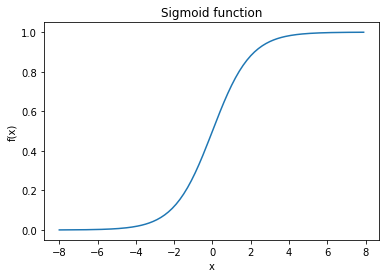

In [18]:
# The main reason why we use sigmoid function is because it exists between (0 to 1). 
# Therefore, it is especially used for models where we have to predict the probability as an output.
# Since probability of anything exists only between the range of 0 and 1, sigmoid is the right choice.
# The function is differentiable. That means, we can find the slope of the sigmoid curve at any two points.
# There are four commonly used and popular activation functions — sigmoid, hyperbolic tangent(tanh), ReLU and Softmax.

x = np.arange(-8, 8, 0.1)
f = 1 / (1 + np.exp(-x))
plt.plot(x, f)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Sigmoid function')
plt.show()

### Tanh function
* Maps values between -1 and 1
* tanh is also sigmoidal (s - shaped)


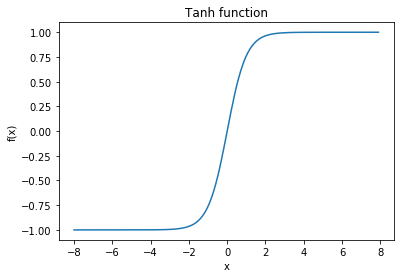

In [19]:
x = np.arange(-8, 8, 0.1)
f = np.tanh(x)
plt.plot(x, f)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Tanh function')
plt.show()

In [20]:
# Build sigmoid function for later use
# sigmoid(w*x + b) = 1/(1+e^-(wTx+b))
# z is (w*x+b), 

def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

###  Building blocks:

Now that we have an understanding of the main components of a NN, let's build one from scratch.

### Structure of an Artificial Neural Network (ANN)
* Input Layer is where data enters the network
* Hidden Layers (on the picture there are two) is where function applies weights (w) to the inputs and directs them through the activation function like sigmoid or relu
* Output Layer is where function returns the outputs from the last layer

<img src='img/nn_structure.jpg'>

### The general methodology to build a Neural Network is to:

1. Define the neural network structure ( # of input units,  # of hidden layers, etc). 
2. Initialize the model's parameters
3. Loop:
    - Implement forward propagation
    - Compute loss
    - Implement backward propagation to get the gradients
    - Update parameters (gradient descent)
    

### 1 & 2 Define and Initialize model's parameters

- n_x : size of the input layer
- n_h : size of the hidden layer
- n_y : size of the output layer

Initialize weights (w) with random values and bias (b) as zeros.
If we initialize weights with 0, the derivative with respect to a loss function will be the same for every w.

In [21]:
# Start with a basic network initialization

# Size of the input layer
n_x = 3
# Size of the hidden layer
n_h = 3
# Size of the output layer
n_y = 1


# W1 - weight matrix of shape (n_h, n_x)
W1 = np.random.randn(n_h,n_x) * 0.01

# b1 - bias vector of shape (n_h, 1)
b1 = np.zeros((n_h,1))

# W2 - weight matrix of shape (n_y, n_h)
W2 = np.random.randn(n_y,n_h) * 0.01
    
# b2 - bias vector of shape (n_y, 1)
b2 = np.zeros((n_y,1))

print("W1 = " + str(W1))
print("b1 = " + str(b1))
print("W2 = " + str(W2))
print("b2 = " + str(b2))

W1 = [[-0.00701855  0.00785847 -0.00459436]
 [ 0.01153013  0.01419068 -0.01077526]
 [-0.00384733 -0.01590927  0.00956441]]
b1 = [[0.]
 [0.]
 [0.]]
W2 = [[ 0.00965059  0.00204146 -0.0045111 ]]
b2 = [[0.]]


In [22]:
# Build function to store parameters for later use

def model_parameters(n_x, n_h, n_y): 
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    # save to dictionary
    parameters = {'W1' : W1,
                  'b1' : b1,
                  'W2' : W2,
                  'b2' : b2}
    return parameters

### Forward propagation 
    
* Calculations in the model that take us from an input layer all the way to the output (how NN make predictions)
* Each independent feature x will be passed to the 1st hidden layer combined with some randomized weight
* 1st hidden layer applies an activation function resulting in an output which then becomes an input for next hidden layer
* Next hidden layer, repeats step above and progresses forward
* The weights of a neuron can be thought of as weights between 2 layers 

<img src='img/forward_nn.JPG'>

In [23]:
# Implement forward pass 
# parameters - dictionary of initial parameters
# X - input data

def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Values from the picture above
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    # use previously built function sigmoid
    A2 = sigmoid(Z2)
    # save to dictionary
    fwd_pass_values = {"Z1" : Z1,
                       "A1" : A1,
                       "Z2" : Z2,
                       "A2" : A2}
    return A2, fwd_pass_values
    
    
    

Once the first forward pass has been completed and we have our prediction, how do we evaluate its accuracy? 

### Loss function
    
* It measures cost associated with an incorrect prediction
* Our goal is to find coefficients that minimize the loss function
* Cross entropy loss is used in classification problems 

In [24]:
# Implement loss function
# cost = -(1/m) * Sum(y*log(a^[2](i)) + (1-y)*log(1-a^[2](i)))
# A2 - output of sigmoid 
# Y is a true output against which we'll be measuring the loss

def entropy_loss(A2, Y, parameters):
    m = Y.shape[1]
    log_prob = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), 1 - Y)
    cost = -(1 / m) * np.sum(log_prob)
    # squeeze removes axes of length one from cost
    cost = float(np.squeeze(cost))
    return cost
    

### Backpropagation
* Mechanism for tuning the weights based on the loss function
* During training we want to find weights and biases that minimize the error (loss function)
* To measure change in the loss function, we need to take the derivative of a function with respect to all the weights and biases
    


In [25]:
# Implement function to measure derivatives
# Pass dictionary of parameters, forward propagation values, input data and labeled data

def backward_propagation(parameters, fwd_pass_values, X, Y):
    m = X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    A1 = fwd_pass_values["A1"]
    A2 = fwd_pass_values["A2"]
    
    # Derivatives of loss func w.r.t parameters
    dZ2 = fwd_pass_values["A2"] - Y
    dW2 = 1 / m*np.dot(dZ2, fwd_pass_values["A1"].T)
    db2 = 1 / m*np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2)*(1 - np.power(A1, 2))
    dW1 = 1 / m*np.dot(dZ1, X.T)
    db1 = 1 / m*np.sum(dZ1, axis=1, keepdims=True)
    
    gradients =       {"dW1" : dW1,
                       "db1" : db1,
                       "dW2" : dW2,
                       "db2" : db2}
    return gradients

Now that we have derivatives (i.e. sensitivity of the loss function to change in parameters) how do we use them to update our weights and biases in order to decrease our loss?

### Gradient Descent
* Optimization algorithm used to find the values of parameters that minimize a cost function
* We can use it to recursively update the weights by iterating over all training samples
* It takes into account learning rate and initial parameter values
* Learning rate controls size of the step on each iteration
* parameter = parameter - learning rate * (derivative of loss function with reference to parameter)
* Derivative, slope of loss function, updates the change you want to make to the parameter 
* Ideally we want Gradient Descent converging to global optimum where derivative equals to zero

<img src='img/gradient_nn.JPG'>

In [26]:
# parameters - dictionary with randomly initialized parameters 
# gradients - derivatives from backward_propagation function
# parameter = parameter - learning rate * (derivative of loss function w.r.t parameter)


def update_parameters(parameters, gradients, learning_rate = 1.1):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = gradients["dW1"]
    db1 = gradients["db1"]
    dW2 = gradients["dW2"]
    db2 = gradients["db2"]
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters
    

### Combine functions above and build your first Neural Network model

In [27]:
# Recall our dataset

print ('The shape of X_train: ' + str(X_train.shape))
print ('The shape of y_train: ' + str(y_train.shape))
print ('The shape of X_test: ' + str(X_test.shape))
print ('The shape of y_test: ' + str(y_test.shape))

The shape of X_train: (15122, 40)
The shape of y_train: (15122,)
The shape of X_test: (3781, 40)
The shape of y_test: (3781,)


In [28]:
# Reshape the data 

X_train_new = X_train.T
y_train_new = y_train.reshape(1, y_train.shape[0])
X_test_new = X_test.T
y_test_new = y_test.reshape(1, y_test.shape[0])

print ('The shape of X_train_new: ' + str(X_train_new.shape))
print ('The shape of y_train_new: ' + str(y_train_new.shape))
print ('The shape of X_test_new: ' + str(X_test_new.shape))
print ('The shape of y_test_new: ' + str(y_test_new.shape))

The shape of X_train_new: (40, 15122)
The shape of y_train_new: (1, 15122)
The shape of X_test_new: (40, 3781)
The shape of y_test_new: (1, 3781)


In [29]:
# size of input layer
n_x = X_train_new.shape[0] # size of input layer
# size of hidden layer
n_h = 4
# size of output layer
n_y = y_train_new.shape[0]

print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 40
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 1


### Use model_parameter functions to initialize parameters

In [30]:
parameters = model_parameters(n_x, n_h, n_y)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.00851201 -0.00399024  0.00552071 -0.0086656  -0.00811778 -0.01744902
  -0.00034416  0.00288709 -0.00312636  0.00893596 -0.00295572  0.00229517
  -0.00195718  0.01885733  0.01297604 -0.00444813  0.00105632  0.00347064
   0.00478134  0.00393837  0.00501915  0.01420705  0.01598184  0.00283492
   0.00712364  0.01314206 -0.01263475 -0.00674642 -0.0164161   0.00811486
   0.00027057 -0.00030224  0.0052736  -0.00429068  0.01988012 -0.00554774
   0.01544936  0.0110721   0.02328301 -0.00283042]
 [ 0.00127137  0.00128385  0.0109509   0.00465384 -0.01742565  0.0059574
   0.00892257 -0.00594419 -0.00868817  0.02679305  0.0058514   0.00137697
  -0.01300018 -0.00455305 -0.00062089 -0.00811507  0.01661513 -0.00995547
   0.00726189 -0.01420131  0.00339887  0.01053909  0.00760746 -0.00423589
  -0.01311119 -0.0021165   0.00021947 -0.01339478 -0.00181273  0.01692416
  -0.00038578  0.00341538  0.0025004   0.01293408  0.01202054  0.00378627
  -0.00567488 -0.01966233 -0.01060219 -0.01320355]
 [-0.0

### Train Neural Network model

In [31]:
# Number of iterations used in gradient descent for loop
num_iterations = 10000

for i in range(0, num_iterations):
    
    # Apply our forward propagation function
    A2, fwd_pass_values = forward_propagation(X_train_new, parameters)
    
    # Calculate cost associated with an incorrect prediction
    cost = entropy_loss(A2, y_train_new, parameters)
    
    # Apply backpropagation function to measure sensitivity of a loss function to parameters
    gradients = backward_propagation(parameters, fwd_pass_values, X_train_new, y_train_new)
    
    # Update parameters using Gradient descent 
    parameters = update_parameters(parameters, gradients)
    
    # Print cost for every 1000th iteration
    if i % 1000 == 0:
        print(i,cost)

0 0.6931421828913022
1000 0.6284593986689866
2000 0.6268111234810758
3000 0.6258925304647401
4000 0.6253483134733954
5000 0.6251010719113644
6000 0.6249450636634025
7000 0.6247676545207661
8000 0.6245918048170128
9000 0.6244782967464007


### Prediction  

Now that we have our updated parameters that minimize the entropy loss, use forward propagation to make a prediction.

A2 is a vector of probabilities, recall it is a sigmoid().

if A2 > 0.5 then 1 and 0 otherwise.  A prediction of 1 indicates a predicted increase in earnings.


In [32]:
# Pass test data into forward_propagation function along with newly optimized parameters
A2, fwd_pass_values = forward_propagation(X_test_new, parameters)

predictions = (A2 > 0.5)

In [33]:
# Accuracy

print ('Accuracy: %d' % float((np.dot(y_test_new , predictions.T) + np.dot(1 - y_test_new,1 - predictions.T))/float(y_test_new.size)*100) + '%')

Accuracy: 61%


### Neural Networks with scikit-learn

Now that we have successfully built a NN from scratch, we have a better appreciation for scikit-learn's built-in support for NN models.

In [34]:
# Import accuracy score
from sklearn.metrics import accuracy_score

# Multi-layer Perceptron classifier contains one or more hidden layers and can learn non-linear functions. 
from sklearn.neural_network import MLPClassifier

# hidden_layer_sizes allows us to set the number of layers and the number of nodes we wish to have in the Neural Network Classifier
# max_iter denotes the number of epochs.
# activation function for the hidden layers.
# solver specifies the algorithm for weight optimization across the nodes.

mlp = MLPClassifier(hidden_layer_sizes = (150,100,50), max_iter=300,activation = 'relu',solver = 'adam', random_state = 0)

# Train
mlp.fit(X_train,y_train)
# Predict 
y_pred = mlp.predict(X_test)
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.60


### Additional Resources

#### Helpful Blog Posts
Machine Learning for Investing: https://hdonnelly6.medium.com/list/machine-learning-for-investing-7f2690bb1826